In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error
from datetime import datetime
import warnings
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score


warnings.filterwarnings("ignore")
sns.set_theme(style="darkgrid")

# Teams

In [2]:
home= "Augsburg"
away= "Bayern Munich"

In [3]:
df_home= pd.read_csv(f"../Data/{home}.csv")
df_home["Date"] = pd.to_datetime(df_home["Date"]) 
df_home.tail()

,Team,Opp,Date,Result,H/A,GF,GA,GD,G-PK,PK,...,xAG,xA,G-xG,np:G-xG,A-xAG,npxG/Sh,FKAtt,PSxG,PSxG/SoT,PSxG+/-
22,Augsburg,Gladbach,2025-02-22,W,A,3,0,3,3,0,...,1.3,2.1,1.5,1.5,1.7,0.09,2,1.9,0.54,1.9
23,Augsburg,Freiburg,2025-03-02,D,H,0,0,0,0,0,...,1.2,1.5,-1.5,-1.5,-1.2,0.11,1,0.7,0.23,0.7
24,Augsburg,Dortmund,2025-03-08,W,A,1,0,1,1,0,...,0.2,0.4,0.8,0.8,0.8,0.03,0,0.0,0.01,0.0
25,Augsburg,Wolfsburg,2025-03-15,W,H,1,0,1,1,0,...,0.7,1.1,0.3,0.3,0.3,0.07,0,0.2,0.12,0.2
26,Augsburg,Hoffenheim,2025-03-29,D,A,1,1,0,1,0,...,0.6,0.3,0.4,0.4,0.4,0.05,0,1.1,0.06,0.1


In [4]:
df_vs_home= pd.read_csv(f"../Data/vs {home}.csv")
df_vs_home["Date"] = pd.to_datetime(df_vs_home["Date"]) 
df_vs_home.tail()

,Team,Opp,Date,Result,H/A,GF,GA,GD,G-PK,PK,...,xAG,xA,G-xG,np:G-xG,A-xAG,npxG/Sh,FKAtt,PSxG,PSxG/SoT,PSxG+/-
22,Gladbach,Augsburg,2025-02-22,L,H,0,3,-3,0,0,...,0.6,0.7,-1.0,-1.0,-0.6,0.15,0,1.2,0.30,-1.8
23,Freiburg,Augsburg,2025-03-02,D,A,0,0,0,0,0,...,0.7,0.5,-0.8,-0.8,-0.7,0.11,1,0.3,0.06,0.3
24,Dortmund,Augsburg,2025-03-08,L,H,0,1,-1,0,0,...,1.0,1.3,-1.2,-1.2,-1.0,0.08,0,0.0,0.04,-1.0
25,Wolfsburg,Augsburg,2025-03-15,L,A,0,1,-1,0,0,...,0.6,0.6,-0.8,-0.8,-0.6,0.06,1,0.4,0.19,-0.6
26,Hoffenheim,Augsburg,2025-03-29,D,H,1,1,0,0,1,...,0.5,1.3,-0.4,-0.7,-0.5,0.06,1,0.6,0.15,-0.4


In [5]:
df_away= pd.read_csv(f"../Data/{away}.csv")
df_away["Date"] = pd.to_datetime(df_away["Date"]) 
df_away.tail()

,Team,Opp,Date,Result,H/A,GF,GA,GD,G-PK,PK,...,xAG,xA,G-xG,np:G-xG,A-xAG,npxG/Sh,FKAtt,PSxG,PSxG/SoT,PSxG+/-
22,Bayern Munich,Eint Frankfurt,2025-02-23,W,H,4,0,4,4,0,...,2.6,3.1,0.2,0.2,-0.6,0.21,0,0.3,0.15,0.3
23,Bayern Munich,Stuttgart,2025-02-28,W,A,3,1,2,3,0,...,1.5,0.8,0.8,0.8,-0.5,0.13,2,0.4,0.13,-0.6
24,Bayern Munich,Bochum,2025-03-08,L,H,2,3,-1,2,0,...,1.6,1.8,-0.4,0.4,0.4,0.12,0,1.5,0.34,-1.5
25,Bayern Munich,Union Berlin,2025-03-15,D,A,1,1,0,1,0,...,1.4,2.3,-0.6,-0.6,-0.4,0.09,1,1.1,0.36,0.1
26,Bayern Munich,St. Pauli,2025-03-29,W,H,3,2,1,3,0,...,3.5,2.3,-0.5,-0.5,-0.5,0.19,0,1.7,0.43,-0.3


In [6]:
df_vs_away= pd.read_csv(f"../Data/vs {away}.csv")
df_vs_away["Date"] = pd.to_datetime(df_away["Date"]) 
df_vs_away.tail()

,Team,Opp,Date,Result,H/A,GF,GA,GD,G-PK,PK,...,xAG,xA,G-xG,np:G-xG,A-xAG,npxG/Sh,FKAtt,PSxG,PSxG/SoT,PSxG+/-
22,Eint Frankfurt,Bayern Munich,2025-02-23,L,A,0,4,-4,0,0,...,0.4,0.7,-0.5,-0.5,-0.4,0.07,0,4.5,0.45,0.5
23,Stuttgart,Bayern Munich,2025-02-28,L,H,1,3,-2,1,0,...,0.8,1.6,0.1,0.1,0.2,0.07,0,2.5,0.31,-0.5
24,Bochum,Bayern Munich,2025-03-08,W,A,3,2,1,3,0,...,0.6,0.9,1.9,1.9,0.4,0.14,0,2.1,0.41,0.1
25,Union Berlin,Bayern Munich,2025-03-15,D,H,1,1,0,1,0,...,0.2,0.4,0.3,0.3,0.8,0.10,0,1.5,0.38,0.5
26,St. Pauli,Bayern Munich,2025-03-29,L,A,2,3,-1,2,0,...,0.9,0.9,1.0,1.0,1.1,0.10,1,3.7,0.46,0.7


In [7]:
print(list(df_away.columns))

['Team', 'Opp', 'Date', 'Result', 'H/A', 'GF', 'GA', 'GD', 'G-PK', 'PK', 'PKatt', 'PKm', 'Poss', 'Att (GK)', 'Thr', 'Pa Launch%', 'Pa AvgLen', 'Won', 'Lost', 'Won%', 'Att To', 'Succ', 'Succ%', 'Tkld', 'Tkld%', 'Carries', 'TotDist', 'PrgDist', 'PrgC', 'Last3rd Car', 'OppCr', 'Stp', 'Stp%', 'CrdY', 'CrdR', '2CrdY', 'Fls', 'Fld', 'GCA', 'PassLive Gc', 'PassDead Gc', 'TO Gc', 'Sh-Gc', 'Fld Gc', 'Def-Gc', 'GK Att', 'Launch%', 'AvgLen', 'Sh', 'G/Sh', 'G/SoT', 'SoT', 'SoT%', 'Dist', 'FK', 'Off', 'PKwon', 'PKcon', 'OG', 'Recov', '#OPA', 'AvgDist', 'Cmp', 'Pas Att', 'Cmp%', 'KP', 'Last3rd PA', 'PPA', 'CrsPA', 'PrgP', 'TotDist Pas', 'PrgDist Pas', 'Cmp 5-15', 'Att 5-15', 'Cmp% 5-15', 'Cmp 15-30', 'Att 15-30', 'Cmp% 15-30', 'Cmp 30+', 'Att 30+', 'Cmp% 30+', 'PKdef', 'PKA', 'PKms', 'Missed PK%', 'PKAg', 'PKsv', 'PK Save%', 'FK Ag', 'CKG', 'OGK', 'Live Pas', 'Dead', 'Pas FK', 'TB', 'Sw', 'Crs', 'TI', 'CK', 'In', 'Out', 'Str', 'Ps Off', 'PTo', 'Rec', 'Last3rd Rec', 'CPA', 'Mis', 'Dis', 'SCA', 'PassL

# Desc

# Features

## Offense

In [8]:
offense= ['G-PK', 'PK', 'PKm', 'Poss', 'PKatt', 'Att To', 'Succ', 'Succ%', 'Tkld', 'Tkld%', 'Carries', 'TotDist', 'PrgDist', 
          'PrgC', 'Last3rd Car', 'GCA', 'PassLive Gc', 'PassDead Gc', 'TO Gc', 'Sh-Gc', 'Fld Gc', 'Def-Gc', 'Sh', 'G/Sh', 
          'G/SoT', 'SoT', 'SoT%', 'Dist', 'FK', 'Off', 'PKwon', 'Cmp', 'Pas Att', 'Cmp%', 'KP', 'Last3rd PA', 'PPA', 'CrsPA', 
          'PrgP', 'TotDist Pas', 'PrgDist Pas', 'Cmp 5-15', 'Att 5-15', 'Cmp% 5-15', 'Cmp 15-30', 'Att 15-30', 'Cmp% 15-30', 
          'Cmp 30+', 'Att 30+', 'Cmp% 30+', 'Live Pas', 'Dead', 'Pas FK', 'TB', 'Sw', 'Crs', 'TI', 'CK', 'In', 'Out', 'Str', 
          'Ps Off', 'PTo', 'Rec', 'Last3rd Rec', 'CPA', 'Mis', 'Dis', 'SCA', 'PassLive Sc', 'PassDead Sc', 'TO Sc', 'Sh-Sh', 
          'Fld Sc', 'Def-Sc', 'Touches', 'Def Pen', 'Tch Def 3rd', 'Tch Mid 3rd', 'Tch Att 3rd', 'Att Pen', 'Live Tch', 'xG', 
          'npxG', 'xGD', 'npxGD', 'xAG', 'xA', 'G-xG', 'np:G-xG', 'A-xAG', 'npxG/Sh', 'FKAtt', 'GF']

In [9]:
df_home_off= df_home[offense]
df_home_off.tail()

,G-PK,PK,PKm,Poss,PKatt,Att To,Succ,Succ%,Tkld,Tkld%,...,xGD,npxGD,xAG,xA,G-xG,np:G-xG,A-xAG,npxG/Sh,FKAtt,GF
22,3,0,0,51,0,18,5,27.8,13,72.2,...,0.5,0.5,1.3,2.1,1.5,1.5,1.7,0.09,2,3
23,0,0,0,51,0,14,5,35.7,7,50.0,...,0.7,0.7,1.2,1.5,-1.5,-1.5,-1.2,0.11,1,0
24,1,0,0,29,0,19,9,47.4,8,42.1,...,-1.0,-1.0,0.2,0.4,0.8,0.8,0.8,0.03,0,1
25,1,0,0,42,0,21,13,61.9,8,38.1,...,0.0,0.0,0.7,1.1,0.3,0.3,0.3,0.07,0,1
26,1,0,0,44,0,16,4,25.0,10,62.5,...,-0.8,-0.1,0.6,0.3,0.4,0.4,0.4,0.05,0,1


In [10]:
df_vs_home_off= df_vs_home[offense]
df_vs_home_off.tail()

,G-PK,PK,PKm,Poss,PKatt,Att To,Succ,Succ%,Tkld,Tkld%,...,xGD,npxGD,xAG,xA,G-xG,np:G-xG,A-xAG,npxG/Sh,FKAtt,GF
22,0,0,0,49,0,10,3,30.0,7,70.0,...,-0.5,-0.5,0.6,0.7,-1.0,-1.0,-0.6,0.15,0,0
23,0,0,0,49,0,13,5,38.5,5,38.5,...,-0.7,-0.7,0.7,0.5,-0.8,-0.8,-0.7,0.11,1,0
24,0,0,0,71,0,19,6,31.6,10,52.6,...,1.0,1.0,1.0,1.3,-1.2,-1.2,-1.0,0.08,0,0
25,0,0,0,58,0,13,4,30.8,8,61.5,...,0.0,0.0,0.6,0.6,-0.8,-0.8,-0.6,0.06,1,0
26,0,1,0,56,1,12,5,41.7,7,58.3,...,0.8,0.1,0.5,1.3,-0.4,-0.7,-0.5,0.06,1,1


In [11]:
df_away_off= df_away[offense]
df_away_off.tail()

,G-PK,PK,PKm,Poss,PKatt,Att To,Succ,Succ%,Tkld,Tkld%,...,xGD,npxGD,xAG,xA,G-xG,np:G-xG,A-xAG,npxG/Sh,FKAtt,GF
22,4,0,0,63,0,21,11,52.4,9,42.9,...,3.4,3.4,2.6,3.1,0.2,0.2,-0.6,0.21,0,4
23,3,0,0,47,0,20,11,55.0,8,40.0,...,1.3,1.3,1.5,0.8,0.8,0.8,-0.5,0.13,2,3
24,2,0,1,73,1,25,11,44.0,13,52.0,...,1.3,0.5,1.6,1.8,-0.4,0.4,0.4,0.12,0,2
25,1,0,0,80,0,22,9,40.9,11,50.0,...,1.0,1.0,1.4,2.3,-0.6,-0.6,-0.4,0.09,1,1
26,3,0,0,65,0,19,6,31.6,12,63.2,...,2.6,2.6,3.5,2.3,-0.5,-0.5,-0.5,0.19,0,3


In [12]:
df_vs_away_off= df_vs_away[offense]
df_vs_away_off.tail()

,G-PK,PK,PKm,Poss,PKatt,Att To,Succ,Succ%,Tkld,Tkld%,...,xGD,npxGD,xAG,xA,G-xG,np:G-xG,A-xAG,npxG/Sh,FKAtt,GF
22,0,0,0,37,0,29,13,44.8,15,51.7,...,-3.4,-3.4,0.4,0.7,-0.5,-0.5,-0.4,0.07,0,0
23,1,0,0,53,0,19,6,31.6,11,57.9,...,-1.3,-1.3,0.8,1.6,0.1,0.1,0.2,0.07,0,1
24,3,0,0,27,0,15,2,13.3,13,86.7,...,-1.3,-0.5,0.6,0.9,1.9,1.9,0.4,0.14,0,3
25,1,0,0,20,0,5,2,40.0,3,60.0,...,-1.0,-1.0,0.2,0.4,0.3,0.3,0.8,0.10,0,1
26,2,0,0,35,0,12,3,25.0,6,50.0,...,-2.6,-2.6,0.9,0.9,1.0,1.0,1.1,0.10,1,2


## Defence

In [13]:
defence= ['OppCr', 'Stp', 'Stp%', 'PKcon', '#OPA', 'AvgDist', 'PKsv', 'PK Save%', 'FK Ag', 'CKG', 'OGK', 'SoTA', 'Saves', 
          'Save%', 'Tkl', 'TklW', 'Tkl Def 3rd', 'Tkl Mid 3rd', 'Tkl Att 3rd', 'Tkl.2', 'Tkl Att', 'Tkl%', 'Lost Tkl', 
          'Ints', 'BlcSh', 'Pass', 'Int', 'Tkl+Int', 'Clr', 'Err',  'PSxG', 'PSxG/SoT', 'PSxG+/-', 'GA']

In [14]:
df_home_def= df_home[defence]
df_home_def.tail()

,OppCr,Stp,Stp%,PKcon,#OPA,AvgDist,PKsv,PK Save%,FK Ag,CKG,...,BlcSh,Pass,Int,Tkl+Int,Clr,Err,PSxG,PSxG/SoT,PSxG+/-,GA
22,12,0,0.0,0,0,13.0,0,NaN,0,0,...,2,2,7,25,25,0,1.9,0.54,1.9,0
23,9,0,0.0,0,0,10.0,0,NaN,0,0,...,2,2,10,21,27,0,0.7,0.23,0.7,0
24,38,3,7.9,0,2,8.9,0,NaN,0,0,...,5,8,11,34,54,0,0.0,0.01,0.0,0
25,16,0,0.0,0,2,18.3,0,NaN,0,0,...,5,9,20,33,21,1,0.2,0.12,0.2,0
26,30,0,0.0,1,1,12.5,0,0.0,0,0,...,3,8,12,25,46,0,1.1,0.06,0.1,1


In [15]:
df_vs_home_def= df_vs_home[defence]
df_vs_home_def.tail()

,OppCr,Stp,Stp%,PKcon,#OPA,AvgDist,PKsv,PK Save%,FK Ag,CKG,...,BlcSh,Pass,Int,Tkl+Int,Clr,Err,PSxG,PSxG/SoT,PSxG+/-,GA
22,18,0,0.0,0,1,12.5,0,NaN,0,1,...,2,11,8,28,33,0,1.2,0.30,-1.8,3
23,14,1,7.1,0,1,14.9,0,NaN,0,0,...,1,9,5,20,21,1,0.3,0.06,0.3,0
24,8,0,0.0,0,0,11.0,0,NaN,0,0,...,2,6,4,25,7,0,0.0,0.04,-1.0,1
25,9,1,11.1,0,0,9.0,0,NaN,0,0,...,3,8,15,30,24,1,0.4,0.19,-0.6,1
26,13,2,15.4,0,2,16.7,0,NaN,0,0,...,6,12,5,19,38,0,0.6,0.15,-0.4,1


In [16]:
df_away_def= df_away[defence]
df_away_def.head()

,OppCr,Stp,Stp%,PKcon,#OPA,AvgDist,PKsv,PK Save%,FK Ag,CKG,...,BlcSh,Pass,Int,Tkl+Int,Clr,Err,PSxG,PSxG/SoT,PSxG+/-,GA
0,10,1,10.0,1,2,26.7,0,0.0,0,0,...,2,8,2,20,13,1,1.8,0.47,-0.2,2
1,8,0,0.0,1,2,14.0,0,NaN,0,0,...,1,9,6,20,21,2,0.1,0.04,0.1,0
2,11,0,0.0,0,2,23.3,0,NaN,0,0,...,1,5,8,17,13,0,0.1,0.09,-0.9,1
3,7,1,14.3,0,1,12.3,0,NaN,0,0,...,0,8,12,32,11,0,0.0,NaN,0.0,0
4,3,0,0.0,0,3,29.7,0,NaN,0,1,...,0,7,12,27,2,1,0.5,0.24,-0.5,1


In [17]:
df_vs_away_def= df_vs_away[defence]
df_vs_away_def.head()

,OppCr,Stp,Stp%,PKcon,#OPA,AvgDist,PKsv,PK Save%,FK Ag,CKG,...,BlcSh,Pass,Int,Tkl+Int,Clr,Err,PSxG,PSxG/SoT,PSxG+/-,GA
0,13,0,0.0,0,0,3.3,0,NaN,0,0,...,5,10,13,34,22,0,2.9,0.37,0.9,3
1,9,0,0.0,1,0,9.0,0,0.0,0,0,...,4,7,15,31,20,1,1.5,0.27,-0.5,2
2,14,1,7.1,1,1,11.0,0,0.0,0,0,...,5,3,10,34,23,2,4.4,0.32,-0.6,6
3,11,1,9.1,0,0,5.0,0,NaN,0,0,...,11,8,11,31,30,0,4.6,0.66,-0.4,5
4,13,1,7.7,0,0,4.3,0,NaN,0,0,...,4,13,9,23,18,0,0.5,0.18,-0.5,1


## Combined

In [18]:
combined= ['Won', 'Lost', 'Won%', 'CrdY', 'CrdR', '2CrdY', 'Fls', 'Fld', 'Recov']

In [19]:
df_home_cmb= df_home[combined]
df_home_cmb.tail()

,Won,Lost,Won%,CrdY,CrdR,2CrdY,Fls,Fld,Recov
22,8,9,47.1,2,0,0,9,10,58
23,16,11,59.3,1,0,0,13,8,45
24,15,14,51.7,4,0,0,12,6,43
25,13,11,54.2,1,0,0,7,9,45
26,13,14,48.1,2,0,0,12,13,37


In [20]:
df_vs_home_cmb= df_vs_home[combined]
df_vs_home_cmb.tail()

,Won,Lost,Won%,CrdY,CrdR,2CrdY,Fls,Fld,Recov
22,9,8,52.9,3,1,0,10,9,37
23,11,16,40.7,1,0,0,9,12,44
24,14,15,48.3,1,0,0,6,12,57
25,11,13,45.8,2,0,0,9,7,47
26,14,13,51.9,1,0,0,14,10,53


In [21]:
df_away_cmb= df_away[combined]
df_away_cmb.tail()

,Won,Lost,Won%,CrdY,CrdR,2CrdY,Fls,Fld,Recov
22,14,8,63.6,1,0,0,8,7,71
23,19,8,70.4,3,0,0,13,12,47
24,21,17,55.3,0,1,0,7,14,40
25,17,13,56.7,2,0,0,8,13,43
26,11,13,45.8,3,0,0,13,4,43


In [22]:
df_vs_away_cmb= df_vs_away[combined]
df_vs_away_cmb.tail()

,Won,Lost,Won%,CrdY,CrdR,2CrdY,Fls,Fld,Recov
22,8,14,36.4,1,0,0,7,7,64
23,8,19,29.6,5,0,0,12,12,38
24,17,21,44.7,6,0,0,14,7,37
25,13,17,43.3,1,0,0,13,8,33
26,13,11,54.2,0,0,0,4,13,43


## By Team

In [23]:
def create_lagged_features(df, target_cols, window= 4):
    """
    Creates lagged and rolling window features for a given dataset.
    
    Parameters:
    df (pd.DataFrame): The input dataframe containing game-by-game data.
    team_col (str): The column name representing the team.
    date_col (str): The column name representing the game date.
    target_cols (list): List of columns to create lagged and rolling features for.
    opponent_col (str, optional): Column representing the opponent team (if applicable).
    lags (list): List of lag periods to include.
    rolling_windows (list): List of rolling window sizes for moving averages and std dev.
    
    Returns:
    pd.DataFrame: Dataframe with additional lagged and rolling features.
    """
    df = df.copy()
    
    
    # Create lagged features for the given columns
    #for col in target_cols:
     #   for lag in range(1, window+1):
      #      df[f'{col}_lag_{lag}'] = df[col].shift(lag)
    
    # Create rolling window features (mean & std)
    for col in target_cols:
        df[f'{col}_rolling_avg_{window}'] = df[col].shift(1).rolling(window, min_periods= 1).mean()
        df[f'{col}_rolling_std_{window}'] = df[col].shift(1).rolling(window, min_periods= 1).std()
    
    # Fill NA values (after shifting to avoid data leakage)
    df = df.fillna(0)
    
    return df


In [24]:
df_home_off= create_lagged_features(df_home_off, offense)
df_home_off.tail()

,G-PK,PK,PKm,Poss,PKatt,Att To,Succ,Succ%,Tkld,Tkld%,...,np:G-xG_rolling_avg_4,np:G-xG_rolling_std_4,A-xAG_rolling_avg_4,A-xAG_rolling_std_4,npxG/Sh_rolling_avg_4,npxG/Sh_rolling_std_4,FKAtt_rolling_avg_4,FKAtt_rolling_std_4,GF_rolling_avg_4,GF_rolling_std_4
22,3,0,0,51,0,18,5,27.8,13,72.2,...,0.075,0.888351,0.100,0.848528,0.0975,0.049244,0.00,0.000000,0.75,0.957427
23,0,0,0,51,0,14,5,35.7,7,50.0,...,0.225,1.099621,0.300,1.143095,0.0950,0.049329,0.50,1.000000,1.00,1.414214
24,1,0,0,29,0,19,9,47.4,8,42.1,...,-0.325,1.312440,-0.175,1.304799,0.0825,0.029861,0.75,0.957427,0.75,1.500000
25,1,0,0,42,0,21,13,61.9,8,38.1,...,-0.050,1.429452,0.100,1.383233,0.0800,0.034641,0.75,0.957427,1.00,1.414214
26,1,0,0,44,0,16,4,25.0,10,62.5,...,0.275,1.281601,0.400,1.213809,0.0750,0.034157,0.75,0.957427,1.25,1.258306


In [25]:
df_vs_home_off= create_lagged_features(df_vs_home_off, offense)
df_vs_home_off.tail()

,G-PK,PK,PKm,Poss,PKatt,Att To,Succ,Succ%,Tkld,Tkld%,...,np:G-xG_rolling_avg_4,np:G-xG_rolling_std_4,A-xAG_rolling_avg_4,A-xAG_rolling_std_4,npxG/Sh_rolling_avg_4,npxG/Sh_rolling_std_4,FKAtt_rolling_avg_4,FKAtt_rolling_std_4,GF_rolling_avg_4,GF_rolling_std_4
22,0,0,0,49,0,10,3,30.0,7,70.0,...,-0.875,0.499166,-0.500,0.316228,0.1275,0.035000,0.00,0.00000,0.50,0.57735
23,0,0,0,49,0,13,5,38.5,5,38.5,...,-1.075,0.221736,-0.625,0.170783,0.1375,0.034034,0.00,0.00000,0.25,0.50000
24,0,0,0,71,0,19,6,31.6,10,52.6,...,-1.075,0.221736,-0.700,0.081650,0.1300,0.036515,0.25,0.50000,0.00,0.00000
25,0,0,0,58,0,13,4,30.8,8,61.5,...,-1.050,0.191485,-0.750,0.173205,0.1075,0.030957,0.25,0.50000,0.00,0.00000
26,0,1,0,56,1,12,5,41.7,7,58.3,...,-0.950,0.191485,-0.725,0.189297,0.1000,0.039158,0.50,0.57735,0.00,0.00000


In [26]:
df_away_def= create_lagged_features(df_away_def, defence)
df_away_def.tail()

,OppCr,Stp,Stp%,PKcon,#OPA,AvgDist,PKsv,PK Save%,FK Ag,CKG,...,Err_rolling_avg_4,Err_rolling_std_4,PSxG_rolling_avg_4,PSxG_rolling_std_4,PSxG/SoT_rolling_avg_4,PSxG/SoT_rolling_std_4,PSxG+/-_rolling_avg_4,PSxG+/-_rolling_std_4,GA_rolling_avg_4,GA_rolling_std_4
22,5,1,20.0,0,2,20.0,0,0.0,0,0,...,0.75,0.957427,0.975,0.974252,0.456667,0.146401,-0.025,0.531507,1.00,1.414214
23,14,1,7.1,0,0,3.0,0,0.0,0,0,...,1.25,0.957427,0.800,1.029563,0.346667,0.223681,0.050,0.556776,0.75,1.500000
24,7,3,42.9,0,3,19.9,0,0.0,0,1,...,1.00,0.816497,0.325,0.250000,0.193333,0.092916,0.075,0.512348,0.25,0.500000
25,9,0,0.0,0,1,13.4,0,0.0,0,0,...,1.50,0.577350,0.700,0.547723,0.230000,0.105515,-0.300,0.948683,1.00,1.414214
26,14,2,14.3,0,0,8.7,0,0.0,0,0,...,1.75,0.500000,0.825,0.573730,0.245000,0.121792,-0.425,0.813941,1.25,1.258306


In [27]:
df_vs_away_def= create_lagged_features(df_vs_away_def, defence)
df_vs_away_def.tail()

,OppCr,Stp,Stp%,PKcon,#OPA,AvgDist,PKsv,PK Save%,FK Ag,CKG,...,Err_rolling_avg_4,Err_rolling_std_4,PSxG_rolling_avg_4,PSxG_rolling_std_4,PSxG/SoT_rolling_avg_4,PSxG/SoT_rolling_std_4,PSxG+/-_rolling_avg_4,PSxG+/-_rolling_std_4,GA_rolling_avg_4,GA_rolling_std_4
22,7,1,14.3,0,0,10.1,0,0.0,0,1,...,0.50,0.577350,2.825,2.641180,0.376667,0.130512,0.575,1.172959,2.25,1.707825
23,8,0,0.0,0,2,15.7,0,0.0,0,0,...,0.75,0.957427,3.650,2.474537,0.396667,0.137961,0.900,0.778888,2.75,1.892969
24,18,0,0.0,1,0,10.0,0,0.0,0,0,...,1.25,1.500000,2.900,2.161789,0.333333,0.106927,0.400,0.898146,2.50,1.732051
25,35,3,8.6,0,0,6.2,0,0.0,0,0,...,1.50,1.290994,2.275,1.844587,0.390000,0.072111,0.025,0.411299,2.25,1.707825
26,9,0,0.0,0,0,4.5,0,0.0,0,0,...,1.50,1.290994,2.650,1.300000,0.387500,0.059090,0.150,0.472582,2.50,1.290994


In [28]:
df_away_off= create_lagged_features(df_away_off, offense)
df_away_off.tail()

,G-PK,PK,PKm,Poss,PKatt,Att To,Succ,Succ%,Tkld,Tkld%,...,np:G-xG_rolling_avg_4,np:G-xG_rolling_std_4,A-xAG_rolling_avg_4,A-xAG_rolling_std_4,npxG/Sh_rolling_avg_4,npxG/Sh_rolling_std_4,FKAtt_rolling_avg_4,FKAtt_rolling_std_4,GF_rolling_avg_4,GF_rolling_std_4
22,4,0,0,63,0,21,11,52.4,9,42.9,...,0.025,1.096586,0.250,1.078579,0.1025,0.055603,0.25,0.500000,2.25,1.707825
23,3,0,0,47,0,20,11,55.0,8,40.0,...,-0.175,0.917878,-0.325,0.512348,0.1200,0.077889,0.25,0.500000,2.75,1.892969
24,2,0,1,73,1,25,11,44.0,13,52.0,...,-0.125,0.977667,-0.500,0.374166,0.1225,0.078049,0.50,1.000000,2.50,1.732051
25,1,0,0,80,0,22,9,40.9,11,50.0,...,0.350,0.341565,-0.175,0.464579,0.1200,0.077889,0.50,1.000000,2.25,1.707825
26,3,0,0,65,0,19,6,31.6,12,63.2,...,0.200,0.588784,-0.275,0.457347,0.1375,0.051235,0.75,0.957427,2.50,1.290994


In [29]:
df_vs_away_off= create_lagged_features(df_vs_away_off, offense)
df_vs_away_off.tail()

,G-PK,PK,PKm,Poss,PKatt,Att To,Succ,Succ%,Tkld,Tkld%,...,np:G-xG_rolling_avg_4,np:G-xG_rolling_std_4,A-xAG_rolling_avg_4,A-xAG_rolling_std_4,npxG/Sh_rolling_avg_4,npxG/Sh_rolling_std_4,FKAtt_rolling_avg_4,FKAtt_rolling_std_4,GF_rolling_avg_4,GF_rolling_std_4
22,0,0,0,37,0,29,13,44.8,15,51.7,...,-0.050,1.405940,-0.050,0.695222,0.110,0.066833,0.0,0.0,1.00,1.414214
23,1,0,0,53,0,19,6,31.6,11,57.9,...,-0.350,1.317826,-0.300,0.547723,0.115,0.061373,0.0,0.0,0.75,1.500000
24,3,0,0,27,0,15,2,13.3,13,86.7,...,-0.625,0.950000,-0.325,0.512348,0.085,0.036968,0.0,0.0,0.25,0.500000
25,1,0,0,20,0,5,2,40.0,3,60.0,...,-0.125,1.613227,-0.200,0.632456,0.105,0.040415,0.0,0.0,1.00,1.414214
26,2,0,0,35,0,12,3,25.0,6,50.0,...,0.450,1.024695,0.250,0.500000,0.095,0.033166,0.0,0.0,1.25,1.258306


In [30]:
df_home_def= create_lagged_features(df_home_def, defence)
df_home_def.tail()

,OppCr,Stp,Stp%,PKcon,#OPA,AvgDist,PKsv,PK Save%,FK Ag,CKG,...,Err_rolling_avg_4,Err_rolling_std_4,PSxG_rolling_avg_4,PSxG_rolling_std_4,PSxG/SoT_rolling_avg_4,PSxG/SoT_rolling_std_4,PSxG+/-_rolling_avg_4,PSxG+/-_rolling_std_4,GA_rolling_avg_4,GA_rolling_std_4
22,12,0,0.0,0,0,13.0,0,0.0,0,0,...,0.75,0.957427,1.075,0.607591,0.2900,0.092736,0.825,0.684957,0.50,0.57735
23,9,0,0.0,0,0,10.0,0,0.0,0,0,...,0.75,0.957427,1.225,0.741058,0.3725,0.135000,1.225,0.741058,0.25,0.50000
24,38,3,7.9,0,2,8.9,0,0.0,0,0,...,0.75,0.957427,1.300,0.637704,0.3350,0.151987,1.300,0.637704,0.00,0.00000
25,16,0,0.0,0,2,18.3,0,0.0,0,0,...,0.25,0.500000,0.850,0.785281,0.2475,0.218842,0.850,0.785281,0.00,0.00000
26,30,0,0.0,1,1,12.5,0,0.0,0,0,...,0.25,0.500000,0.700,0.852447,0.2250,0.228400,0.700,0.852447,0.00,0.00000


In [31]:
df_vs_home_def= create_lagged_features(df_vs_home_def, defence)
df_vs_home_def.tail()

,OppCr,Stp,Stp%,PKcon,#OPA,AvgDist,PKsv,PK Save%,FK Ag,CKG,...,Err_rolling_avg_4,Err_rolling_std_4,PSxG_rolling_avg_4,PSxG_rolling_std_4,PSxG/SoT_rolling_avg_4,PSxG/SoT_rolling_std_4,PSxG+/-_rolling_avg_4,PSxG+/-_rolling_std_4,GA_rolling_avg_4,GA_rolling_std_4
22,18,0,0.0,0,1,12.5,0,0.0,0,1,...,0.25,0.50000,0.875,0.629153,0.3900,0.243721,0.125,0.442531,0.75,0.957427
23,14,1,7.1,0,1,14.9,0,0.0,0,0,...,0.25,0.50000,0.725,0.340343,0.3900,0.243721,-0.275,1.087428,1.00,1.414214
24,8,0,0.0,0,0,11.0,0,0.0,0,0,...,0.50,0.57735,0.625,0.403113,0.2175,0.113248,-0.125,1.123610,0.75,1.500000
25,9,1,11.1,0,0,9.0,0,0.0,0,0,...,0.25,0.50000,0.475,0.512348,0.1525,0.124197,-0.525,1.062623,1.00,1.414214
26,13,2,15.4,0,2,16.7,0,0.0,0,0,...,0.50,0.57735,0.475,0.512348,0.1475,0.121484,-0.775,0.873212,1.25,1.258306


In [32]:
df_home_cmb.rename(columns= {col: f"h_{col}" for col in df_home_cmb.columns}, inplace= True)
df_home_cmb= create_lagged_features(df_home_cmb, df_home_cmb.columns)
df_home_cmb.tail()

,h_Won,h_Lost,h_Won%,h_CrdY,h_CrdR,h_2CrdY,h_Fls,h_Fld,h_Recov,h_Won_rolling_avg_4,...,h_CrdR_rolling_avg_4,h_CrdR_rolling_std_4,h_2CrdY_rolling_avg_4,h_2CrdY_rolling_std_4,h_Fls_rolling_avg_4,h_Fls_rolling_std_4,h_Fld_rolling_avg_4,h_Fld_rolling_std_4,h_Recov_rolling_avg_4,h_Recov_rolling_std_4
22,8,9,47.1,2,0,0,9,10,58,17.25,...,0.0,0.0,0.0,0.0,11.75,4.500000,12.00,2.449490,43.25,6.396614
23,16,11,59.3,1,0,0,13,8,45,14.75,...,0.0,0.0,0.0,0.0,12.00,4.242641,12.25,2.061553,48.00,8.793937
24,15,14,51.7,4,0,0,12,6,43,15.25,...,0.0,0.0,0.0,0.0,10.75,2.061553,10.50,1.914854,48.25,8.655441
25,13,11,54.2,1,0,0,7,9,45,11.75,...,0.0,0.0,0.0,0.0,11.50,1.732051,9.00,2.581989,46.00,8.524475
26,13,14,48.1,2,0,0,12,13,37,13.00,...,0.0,0.0,0.0,0.0,10.25,2.753785,8.25,1.707825,47.75,6.898067


In [33]:
df_vs_home_cmb.rename(columns= {col: f"vh_{col}" for col in df_vs_home_cmb.columns}, inplace= True)
df_vs_home_cmb= create_lagged_features(df_vs_home_cmb, df_vs_home_cmb.columns)
df_vs_home_cmb.tail()

,vh_Won,vh_Lost,vh_Won%,vh_CrdY,vh_CrdR,vh_2CrdY,vh_Fls,vh_Fld,vh_Recov,vh_Won_rolling_avg_4,...,vh_CrdR_rolling_avg_4,vh_CrdR_rolling_std_4,vh_2CrdY_rolling_avg_4,vh_2CrdY_rolling_std_4,vh_Fls_rolling_avg_4,vh_Fls_rolling_std_4,vh_Fld_rolling_avg_4,vh_Fld_rolling_std_4,vh_Recov_rolling_avg_4,vh_Recov_rolling_std_4
22,9,8,52.9,3,1,0,10,9,37,12.00,...,0.00,0.0,0.0,0.0,12.25,2.872281,11.25,3.593976,42.25,6.238322
23,11,16,40.7,1,0,0,9,12,44,12.50,...,0.25,0.5,0.0,0.0,12.50,2.516611,11.50,3.316625,42.50,5.916080
24,14,15,48.3,1,0,0,6,12,57,12.00,...,0.25,0.5,0.0,0.0,10.75,1.500000,10.50,1.732051,41.25,4.425306
25,11,13,45.8,2,0,0,9,7,47,10.50,...,0.25,0.5,0.0,0.0,9.25,2.500000,11.25,1.500000,44.00,9.201449
26,14,13,51.9,1,0,0,14,10,53,11.25,...,0.25,0.5,0.0,0.0,8.50,1.732051,10.00,2.449490,46.25,8.301606


In [34]:
df_away_cmb.rename(columns= {col: f"va_{col}" for col in df_away_cmb.columns}, inplace= True)
df_away_cmb= create_lagged_features(df_away_cmb, df_away_cmb.columns)
df_away_cmb.tail()

,va_Won,va_Lost,va_Won%,va_CrdY,va_CrdR,va_2CrdY,va_Fls,va_Fld,va_Recov,va_Won_rolling_avg_4,...,va_CrdR_rolling_avg_4,va_CrdR_rolling_std_4,va_2CrdY_rolling_avg_4,va_2CrdY_rolling_std_4,va_Fls_rolling_avg_4,va_Fls_rolling_std_4,va_Fld_rolling_avg_4,va_Fld_rolling_std_4,va_Recov_rolling_avg_4,va_Recov_rolling_std_4
22,14,8,63.6,1,0,0,8,7,71,10.75,...,0.00,0.0,0.0,0.0,9.50,2.516611,11.50,4.123106,45.00,6.480741
23,19,8,70.4,3,0,0,13,12,47,12.25,...,0.00,0.0,0.0,0.0,9.25,2.629956,9.50,3.785939,53.50,12.233833
24,21,17,55.3,0,1,0,7,14,40,14.25,...,0.00,0.0,0.0,0.0,10.75,2.629956,10.25,3.947573,52.25,12.685293
25,17,13,56.7,2,0,0,8,13,43,17.00,...,0.25,0.5,0.0,0.0,10.25,3.201562,12.00,3.559026,50.25,14.127397
26,11,13,45.8,3,0,0,13,4,43,17.75,...,0.25,0.5,0.0,0.0,9.00,2.708013,11.50,3.109126,50.25,14.127397


In [35]:
df_vs_away_cmb.rename(columns= {col: f"a_{col}" for col in df_vs_away_cmb.columns}, inplace= True)
df_vs_away_cmb= create_lagged_features(df_vs_away_cmb, df_vs_away_cmb.columns)
df_vs_away_cmb.tail()

,a_Won,a_Lost,a_Won%,a_CrdY,a_CrdR,a_2CrdY,a_Fls,a_Fld,a_Recov,a_Won_rolling_avg_4,...,a_CrdR_rolling_avg_4,a_CrdR_rolling_std_4,a_2CrdY_rolling_avg_4,a_2CrdY_rolling_std_4,a_Fls_rolling_avg_4,a_Fls_rolling_std_4,a_Fld_rolling_avg_4,a_Fld_rolling_std_4,a_Recov_rolling_avg_4,a_Recov_rolling_std_4
22,8,14,36.4,1,0,0,7,7,64,9.75,...,0.0,0.0,0.0,0.0,12.25,3.862210,9.25,2.872281,38.50,7.416198
23,8,19,29.6,5,0,0,12,12,38,8.00,...,0.0,0.0,0.0,0.0,10.25,4.031129,8.75,3.095696,45.00,14.674240
24,17,21,44.7,6,0,0,14,7,37,7.50,...,0.0,0.0,0.0,0.0,10.75,4.112988,10.25,2.753785,45.75,14.056434
25,13,17,43.3,1,0,0,13,8,33,10.50,...,0.0,0.0,0.0,0.0,12.25,3.862210,9.75,3.201562,47.00,12.569805
26,13,11,54.2,0,0,0,4,13,43,11.50,...,0.0,0.0,0.0,0.0,11.50,3.109126,8.50,2.380476,43.00,14.165686


In [36]:
df_home_off.drop(columns=['GF'], inplace= True)
df_away_off.drop(columns=['GF'], inplace= True)
df_vs_home_off.drop(columns=['GF'], inplace= True)
df_vs_away_off.drop(columns=['GF'], inplace= True)

df_home_def.drop(columns=['GA'], inplace= True)
df_away_def.drop(columns=['GA'], inplace= True)
df_vs_home_def.drop(columns=['GA'], inplace= True)
df_vs_away_def.drop(columns=['GA'], inplace= True)

## Final DFs

In [37]:
df_home_frw= pd.concat([df_home_off[-1:].reset_index(drop=True),
                        df_home_cmb[-1:].reset_index(drop= True),
                        df_away_cmb[-1:].reset_index(drop= True), 
                        df_away_def[-1:].reset_index(drop=True),
                        ], 
                        axis= 1
                        )
#df_home_frw["Tm_Rest"]= (game_day- df_home['Date'].iloc[-1]).days
#df_home_frw["Opp_Rest"]= (game_day- df_away['Date'].iloc[-1]).days
df_home_frw["H/A"]= "H"
df_home_frw

,G-PK,PK,PKm,Poss,PKatt,Att To,Succ,Succ%,Tkld,Tkld%,...,Err_rolling_std_4,PSxG_rolling_avg_4,PSxG_rolling_std_4,PSxG/SoT_rolling_avg_4,PSxG/SoT_rolling_std_4,PSxG+/-_rolling_avg_4,PSxG+/-_rolling_std_4,GA_rolling_avg_4,GA_rolling_std_4,H/A
0,1,0,0,44,0,16,4,25.0,10,62.5,...,0.5,0.825,0.57373,0.245,0.121792,-0.425,0.813941,1.25,1.258306,H


In [38]:
df_home_gf= pd.concat([df_home_off[:-1], 
                       df_vs_home_def[:-1], 
                       df_home_cmb[:-1].reset_index(drop= True),
                       df_away_cmb[:-1].reset_index(drop= True), 
                       df_home[['H/A', 'GF']][1:].reset_index(drop=True)
                       ], 
                       axis= 1
                       )
df_home_gf.head()

,G-PK,PK,PKm,Poss,PKatt,Att To,Succ,Succ%,Tkld,Tkld%,...,va_2CrdY_rolling_avg_4,va_2CrdY_rolling_std_4,va_Fls_rolling_avg_4,va_Fls_rolling_std_4,va_Fld_rolling_avg_4,va_Fld_rolling_std_4,va_Recov_rolling_avg_4,va_Recov_rolling_std_4,H/A,GF
0,2,0,0,46,0,15,8,53.3,7,46.7,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,A,0
1,0,0,0,64,0,18,5,27.8,11,61.1,...,0.0,0.0,11.000000,0.000000,10.000000,0.000000,35.000000,0.000000,H,3
2,3,0,0,44,0,10,8,80.0,2,20.0,...,0.0,0.0,12.000000,1.414214,10.000000,0.000000,42.500000,10.606602,H,2
3,2,0,0,73,0,11,5,45.5,6,54.5,...,0.0,0.0,11.666667,1.154701,10.666667,1.154701,46.333333,10.016653,A,0
4,0,0,1,41,1,12,8,66.7,2,16.7,...,0.0,0.0,12.000000,1.154701,9.000000,3.464102,49.750000,10.657548,H,2


In [39]:
df_home_bcw= pd.concat([df_home_def[-1:].reset_index(drop=True), 
                        df_away_off[-1:].reset_index(drop=True),
                        df_home_cmb[-1:].reset_index(drop= True),
                        df_away_cmb[-1:].reset_index(drop= True),
                        ], 
                        axis= 1
                        )
#df_home_bcw["Tm_Rest"]= (game_day- df_home['Date'].iloc[-1]).days
#df_home_bcw["Opp_Rest"]= (game_day- df_away['Date'].iloc[-1]).days
df_home_bcw["H/A"]= "H"
df_home_bcw

,OppCr,Stp,Stp%,PKcon,#OPA,AvgDist,PKsv,PK Save%,FK Ag,CKG,...,va_CrdR_rolling_std_4,va_2CrdY_rolling_avg_4,va_2CrdY_rolling_std_4,va_Fls_rolling_avg_4,va_Fls_rolling_std_4,va_Fld_rolling_avg_4,va_Fld_rolling_std_4,va_Recov_rolling_avg_4,va_Recov_rolling_std_4,H/A
0,30,0,0.0,1,1,12.5,0,0.0,0,0,...,0.5,0.0,0.0,9.0,2.708013,11.5,3.109126,50.25,14.127397,H


In [40]:
df_home_ga= pd.concat([df_home_def[:-1], 
                       df_vs_home_off[:-1], 
                       df_home_cmb[:-1].reset_index(drop= True),
                       df_away_cmb[:-1].reset_index(drop= True),
                       df_home[['H/A', 'GA']][1:].reset_index(drop=True)
                       ], 
                       axis= 1)
df_home_ga.head()

,OppCr,Stp,Stp%,PKcon,#OPA,AvgDist,PKsv,PK Save%,FK Ag,CKG,...,va_2CrdY_rolling_avg_4,va_2CrdY_rolling_std_4,va_Fls_rolling_avg_4,va_Fls_rolling_std_4,va_Fld_rolling_avg_4,va_Fld_rolling_std_4,va_Recov_rolling_avg_4,va_Recov_rolling_std_4,H/A,GA
0,14,0,0.0,0,1,11.0,0,0.0,0,0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,A,4
1,9,0,0.0,1,1,14.0,0,0.0,0,0,...,0.0,0.0,11.000000,0.000000,10.000000,0.000000,35.000000,0.000000,H,1
2,18,2,11.1,0,0,9.9,0,0.0,0,0,...,0.0,0.0,12.000000,1.414214,10.000000,0.000000,42.500000,10.606602,H,3
3,4,0,0.0,0,2,19.7,0,0.0,0,0,...,0.0,0.0,11.666667,1.154701,10.666667,1.154701,46.333333,10.016653,A,4
4,18,1,5.6,0,2,15.4,0,0.0,0,0,...,0.0,0.0,12.000000,1.154701,9.000000,3.464102,49.750000,10.657548,H,1


In [41]:
df_away_frw= pd.concat([df_away_off[-1:].reset_index(drop=True), 
                        df_home_def[-1:].reset_index(drop=True),
                        df_home_cmb[-1:].reset_index(drop= True),
                        df_away_cmb[-1:].reset_index(drop= True),
                        ], 
                        axis= 1
                        )
#df_away_frw["Tm_Rest"]= (game_day- df_away['Date'].iloc[-1]).days
#df_away_frw["Opp_Rest"]= (game_day- df_home['Date'].iloc[-1]).days
df_away_frw["H/A"]= "A"
df_away_frw

,G-PK,PK,PKm,Poss,PKatt,Att To,Succ,Succ%,Tkld,Tkld%,...,va_CrdR_rolling_std_4,va_2CrdY_rolling_avg_4,va_2CrdY_rolling_std_4,va_Fls_rolling_avg_4,va_Fls_rolling_std_4,va_Fld_rolling_avg_4,va_Fld_rolling_std_4,va_Recov_rolling_avg_4,va_Recov_rolling_std_4,H/A
0,3,0,0,65,0,19,6,31.6,12,63.2,...,0.5,0.0,0.0,9.0,2.708013,11.5,3.109126,50.25,14.127397,A


In [42]:
df_away_gf= pd.concat([df_away_off[:-1], 
                       df_vs_away_def[:-1], 
                       df_home_cmb[:-1].reset_index(drop= True),
                       df_away_cmb[:-1].reset_index(drop= True),
                       df_away[['H/A', 'GF']][1:].reset_index(drop=True)
                       ], 
                       axis= 1)
df_away_gf.head()

,G-PK,PK,PKm,Poss,PKatt,Att To,Succ,Succ%,Tkld,Tkld%,...,va_2CrdY_rolling_avg_4,va_2CrdY_rolling_std_4,va_Fls_rolling_avg_4,va_Fls_rolling_std_4,va_Fld_rolling_avg_4,va_Fld_rolling_std_4,va_Recov_rolling_avg_4,va_Recov_rolling_std_4,H/A,GF
0,2,0,0,70,0,33,16,48.5,13,39.4,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,H,2
1,1,1,0,66,1,22,13,59.1,9,40.9,...,0.0,0.0,11.000000,0.000000,10.000000,0.000000,35.000000,0.000000,A,6
2,4,1,0,70,1,32,14,43.8,18,56.3,...,0.0,0.0,12.000000,1.414214,10.000000,0.000000,42.500000,10.606602,A,5
3,5,0,0,69,0,23,12,52.2,10,43.5,...,0.0,0.0,11.666667,1.154701,10.666667,1.154701,46.333333,10.016653,H,1
4,1,0,0,69,0,19,10,52.6,8,42.1,...,0.0,0.0,12.000000,1.154701,9.000000,3.464102,49.750000,10.657548,A,3


In [43]:
df_away_bcw= pd.concat([df_away_def[-1:].reset_index(drop=True), 
                        df_home_off[-1:].reset_index(drop=True),
                        df_home_cmb[-1:].reset_index(drop= True),
                        df_away_cmb[-1:].reset_index(drop= True),
                        ], 
                        axis= 1
                        )
#df_away_bcw["Tm_Rest"]= (game_day- df_away['Date'].iloc[-1]).days
#df_away_bcw["Opp_Rest"]= (game_day- df_home['Date'].iloc[-1]).days
df_away_bcw["H/A"]= "H"
df_away_bcw

,OppCr,Stp,Stp%,PKcon,#OPA,AvgDist,PKsv,PK Save%,FK Ag,CKG,...,va_CrdR_rolling_std_4,va_2CrdY_rolling_avg_4,va_2CrdY_rolling_std_4,va_Fls_rolling_avg_4,va_Fls_rolling_std_4,va_Fld_rolling_avg_4,va_Fld_rolling_std_4,va_Recov_rolling_avg_4,va_Recov_rolling_std_4,H/A
0,14,2,14.3,0,0,8.7,0,0.0,0,0,...,0.5,0.0,0.0,9.0,2.708013,11.5,3.109126,50.25,14.127397,H


In [44]:
df_away_ga= pd.concat([df_away_def[:-1], 
                       df_vs_away_off[:-1],
                       df_home_cmb[:-1].reset_index(drop= True),
                       df_away_cmb[:-1].reset_index(drop= True), 
                       df_away[['H/A', 'GA']][1:].reset_index(drop=True)
                       ], 
                       axis= 1)
df_away_ga.head()

,OppCr,Stp,Stp%,PKcon,#OPA,AvgDist,PKsv,PK Save%,FK Ag,CKG,...,va_2CrdY_rolling_avg_4,va_2CrdY_rolling_std_4,va_Fls_rolling_avg_4,va_Fls_rolling_std_4,va_Fld_rolling_avg_4,va_Fld_rolling_std_4,va_Recov_rolling_avg_4,va_Recov_rolling_std_4,H/A,GA
0,10,1,10.0,1,2,26.7,0,0.0,0,0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,H,0
1,8,0,0.0,1,2,14.0,0,0.0,0,0,...,0.0,0.0,11.000000,0.000000,10.000000,0.000000,35.000000,0.000000,A,1
2,11,0,0.0,0,2,23.3,0,0.0,0,0,...,0.0,0.0,12.000000,1.414214,10.000000,0.000000,42.500000,10.606602,A,0
3,7,1,14.3,0,1,12.3,0,0.0,0,0,...,0.0,0.0,11.666667,1.154701,10.666667,1.154701,46.333333,10.016653,H,1
4,3,0,0.0,0,3,29.7,0,0.0,0,1,...,0.0,0.0,12.000000,1.154701,9.000000,3.464102,49.750000,10.657548,A,3


In [45]:
df_home_gf = df_home_gf.fillna(0)

In [46]:
df_home_ga = df_home_ga.fillna(0)

In [47]:
df_away_ga = df_away_ga.fillna(0)

In [48]:
df_away_gf = df_away_gf.fillna(0)

# Categories

In [49]:
# Define bins for football goals classification
bins = [-1, 0, 1, 2, 3, float('inf')]  # -1 to include 0 as a bin
labels = [0, 1, 2, 3, 4]  # Assigning numeric class labels

# Apply binning
df_home_gf['GFC'] = pd.cut(df_home_gf['GF'], bins=bins, labels=labels)
df_away_gf['GFC'] = pd.cut(df_away_gf['GF'], bins=bins, labels=labels)
df_home_ga['GAC'] = pd.cut(df_home_ga['GA'], bins=bins, labels=labels)
df_away_ga['GAC'] = pd.cut(df_away_ga['GA'], bins=bins, labels=labels)

In [50]:
df_home_gf.drop(columns=['GF'], inplace= True)
df_away_gf.drop(columns=['GF'], inplace= True)

df_home_ga.drop(columns=['GA'], inplace= True)
df_away_ga.drop(columns=['GA'], inplace= True)


# Models

## Classification

### Model Home

In [51]:
target = "GFC"  # Goals For

# Separate features and target
X = df_home_gf.drop(columns=[target])
y = df_home_gf[target]
categorical_features = ["H/A"]  # Home/Away column
numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()


In [52]:
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_features),
    ("cat", OneHotEncoder(drop="first"), categorical_features)
])

In [53]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=5, class_weight='balanced', random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, objective='multi:softmax', 
                             num_class=6, eval_metric='mlogloss', random_state=42),
   # "LightGBM": LGBMRegressor(n_estimators=100, random_state=42),
   # "Linear Regression": LinearRegression()
}

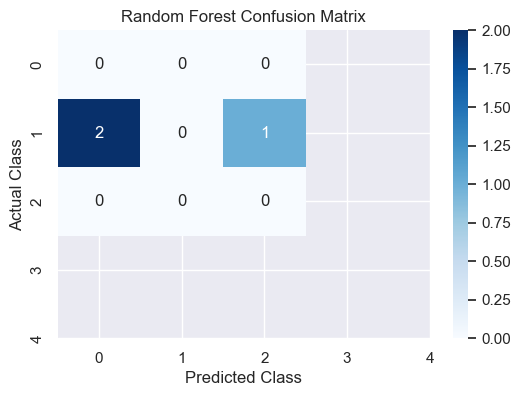

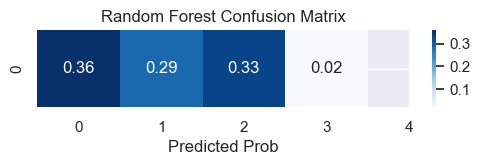

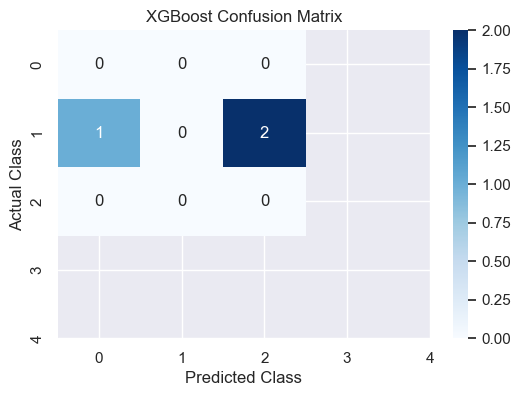

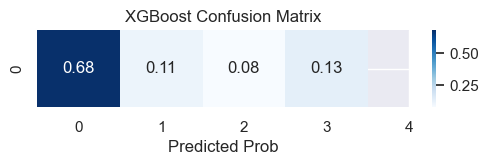

In [54]:
train_size = int(len(X) * 0.9)

X_train, y_train = X.iloc[:train_size], y.iloc[:train_size]
X_test, y_test = X.iloc[train_size:], y.iloc[train_size:]
#results = {}
for name, model in models.items():
    # Define the pipeline
    model_pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("model", model)
    ])
    
    # Train the model
    model_pipeline.fit(X_train, y_train)
    
    # Predictions
    y_pred = model_pipeline.predict(X_test)
    pred= model_pipeline.predict_proba(df_home_frw)

    plt.figure(figsize=(6,4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted Class")
    plt.ylabel("Actual Class")
    plt.title(f"{name} Confusion Matrix")
    plt.show()
    plt.figure(figsize=(6,1))
    sns.heatmap(pred, annot=True, fmt='.2f', cmap='Blues', xticklabels=labels)
    plt.xlabel("Predicted Prob")
    plt.ylabel("")
    plt.title(f"{name} Confusion Matrix")
    plt.show()
    # Evaluate performance
    

### Model vs Home

In [55]:
target = "GAC"  # Goals For

# Separate features and target
X = df_home_ga.drop(columns=[target])
y = df_home_ga[target]
categorical_features = ["H/A"]  # Home/Away column
numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()


In [56]:
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_features),
    ("cat", OneHotEncoder(drop="first"), categorical_features)
])

In [57]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=5, class_weight='balanced', random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, objective='multi:softmax', 
                             num_class=6, eval_metric='mlogloss', random_state=42),
   # "LightGBM": LGBMRegressor(n_estimators=100, random_state=42),
   # "Linear Regression": LinearRegression()
}

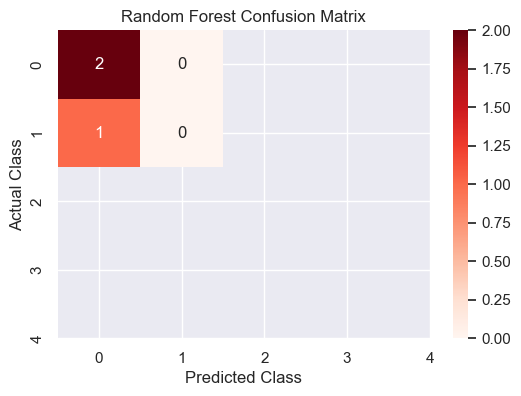

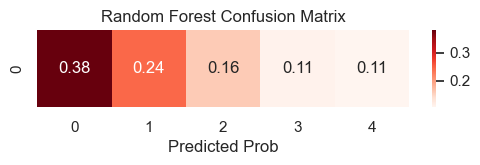

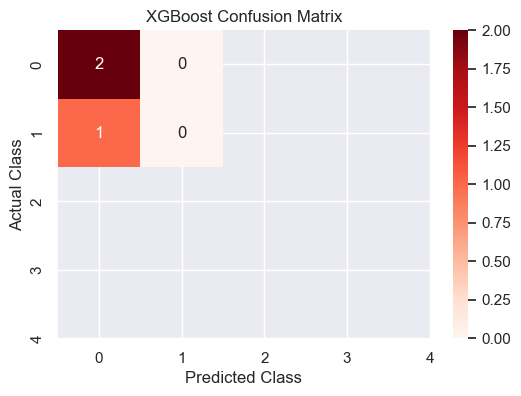

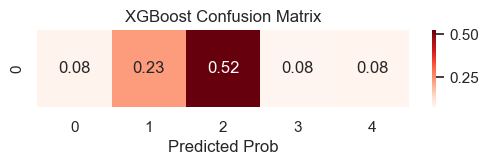

In [58]:
train_size = int(len(X) * 0.9)

X_train, y_train = X.iloc[:train_size], y.iloc[:train_size]
X_test, y_test = X.iloc[train_size:], y.iloc[train_size:]
#results = {}
for name, model in models.items():
    # Define the pipeline
    model_pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("model", model)
    ])
    
    # Train the model
    model_pipeline.fit(X_train, y_train)
    
    # Predictions
    y_pred = model_pipeline.predict(X_test)
    pred= model_pipeline.predict_proba(df_home_bcw)

    plt.figure(figsize=(6,4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Reds', xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted Class")
    plt.ylabel("Actual Class")
    plt.title(f"{name} Confusion Matrix")
    plt.show()
    plt.figure(figsize=(6,1))
    sns.heatmap(pred, annot=True, fmt='.2f', cmap='Reds', xticklabels=labels)
    plt.xlabel("Predicted Prob")
    plt.ylabel("")
    plt.title(f"{name} Confusion Matrix")
    plt.show()
    # Evaluate performance
    

### Model Away

In [59]:
target = "GFC"  # Goals For

# Separate features and target
X = df_away_gf.drop(columns=[target])
y = df_away_gf[target]
categorical_features = ["H/A"]  # Home/Away column
numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()


In [60]:
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_features),
    ("cat", OneHotEncoder(drop="first"), categorical_features)
])

In [61]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=5, class_weight='balanced', random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, objective='multi:softmax', 
                             num_class=6, eval_metric='mlogloss', random_state=42),
   # "LightGBM": LGBMRegressor(n_estimators=100, random_state=42),
   # "Linear Regression": LinearRegression()
}

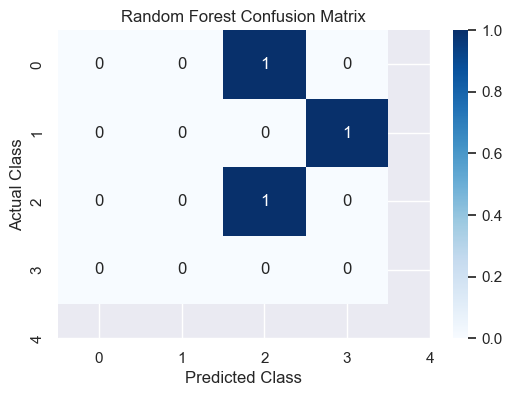

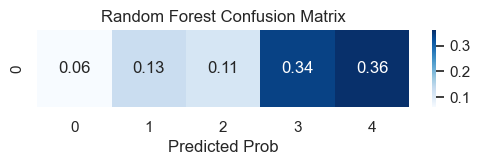

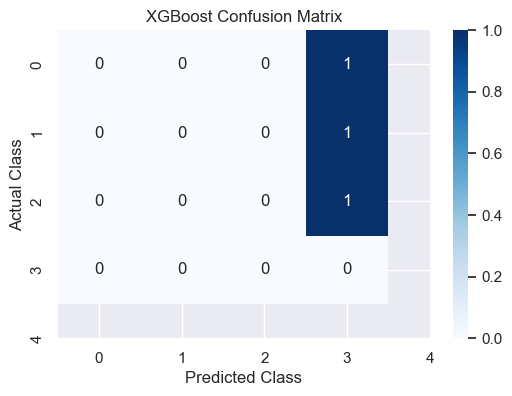

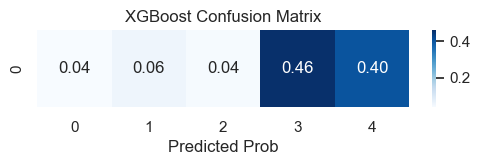

In [62]:
train_size = int(len(X) * 0.9)

X_train, y_train = X.iloc[:train_size], y.iloc[:train_size]
X_test, y_test = X.iloc[train_size:], y.iloc[train_size:]
#results = {}
for name, model in models.items():
    # Define the pipeline
    model_pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("model", model)
    ])
    
    # Train the model
    model_pipeline.fit(X_train, y_train)
    
    # Predictions
    y_pred = model_pipeline.predict(X_test)
    pred= model_pipeline.predict_proba(df_away_frw)

    plt.figure(figsize=(6,4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted Class")
    plt.ylabel("Actual Class")
    plt.title(f"{name} Confusion Matrix")
    plt.show()
    plt.figure(figsize=(6,1))
    sns.heatmap(pred, annot=True, fmt='.2f', cmap='Blues', xticklabels=labels)
    plt.xlabel("Predicted Prob")
    plt.ylabel("")
    plt.title(f"{name} Confusion Matrix")
    plt.show()
    # Evaluate performance
    

### Model vs Away

In [63]:
target = "GAC"  # Goals For

# Separate features and target
X = df_away_ga.drop(columns=[target])
y = df_away_ga[target]
categorical_features = ["H/A"]  # Home/Away column
numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()


In [64]:
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_features),
    ("cat", OneHotEncoder(drop="first"), categorical_features)
])

In [65]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=5, class_weight='balanced', random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, objective='multi:softmax', 
                             num_class=6, eval_metric='mlogloss', random_state=42),
   # "LightGBM": LGBMRegressor(n_estimators=100, random_state=42),
   # "Linear Regression": LinearRegression()
}

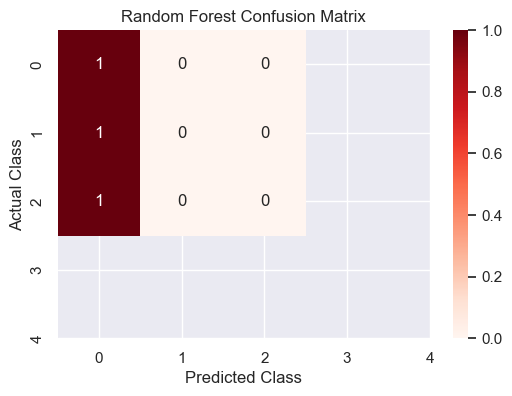

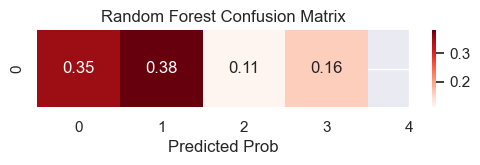

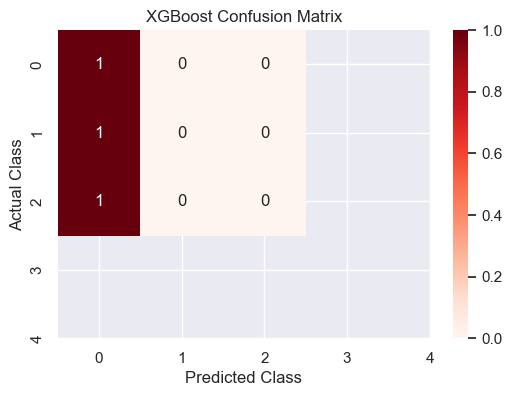

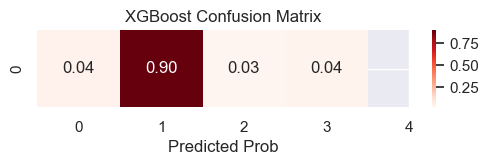

In [66]:
train_size = int(len(X) * 0.9)

X_train, y_train = X.iloc[:train_size], y.iloc[:train_size]
X_test, y_test = X.iloc[train_size:], y.iloc[train_size:]
#results = {}
for name, model in models.items():
    # Define the pipeline
    model_pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("model", model)
    ])
    
    # Train the model
    model_pipeline.fit(X_train, y_train)
    
    # Predictions
    y_pred = model_pipeline.predict(X_test)
    pred= model_pipeline.predict_proba(df_away_bcw)

    plt.figure(figsize=(6,4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Reds', xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted Class")
    plt.ylabel("Actual Class")
    plt.title(f"{name} Confusion Matrix")
    plt.show()
    plt.figure(figsize=(6,1))
    sns.heatmap(pred, annot=True, fmt='.2f', cmap='Reds', xticklabels=labels)
    plt.xlabel("Predicted Prob")
    plt.ylabel("")
    plt.title(f"{name} Confusion Matrix")
    plt.show()
    # Evaluate performance
    

## Regression

### Model Home

In [67]:
target = "Tm_PTS"  # Goals For

# Separate features and target
X = df_home_gf.drop(columns=[target])
y = df_home_gf[target]
categorical_features = ["H/A"]  # Home/Away column
numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()


In [68]:
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_features),
    ("cat", OneHotEncoder(drop="first"), categorical_features)
])

In [69]:
model_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor(n_estimators=20, random_state=25))
])

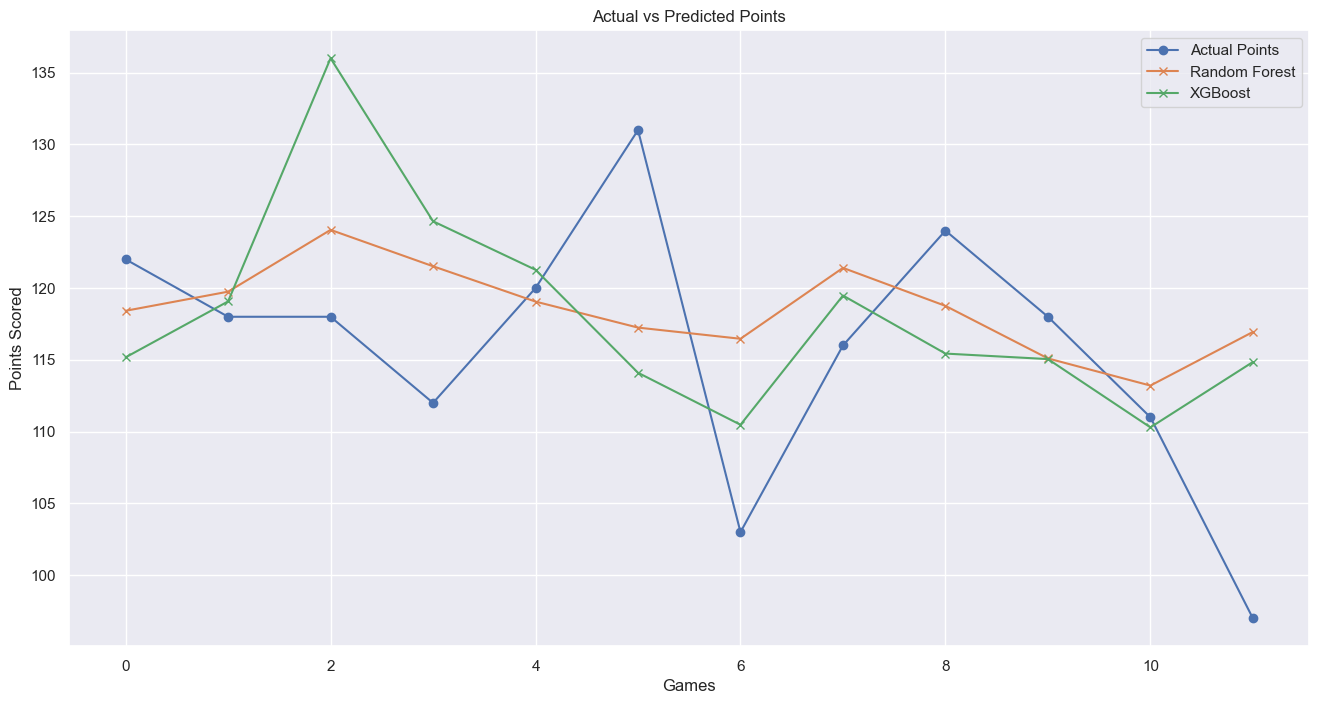

In [85]:
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
   # "LightGBM": LGBMRegressor(n_estimators=100, random_state=42),
   # "Linear Regression": LinearRegression()
}

# Split into training and testing sets
train_size = int(len(X) * 0.8)

X_train, y_train = X.iloc[:train_size], y.iloc[:train_size]
X_test, y_test = X.iloc[train_size:], y.iloc[train_size:]
# Train and evaluate each model
results = {}
plt.figure(figsize=(16,8))
plt.plot(y_test.values, label='Actual Points', marker='o')
for name, model in models.items():
    # Define the pipeline
    model_pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("model", model)
    ])
    
    # Train the model
    model_pipeline.fit(X_train, y_train)
    
    # Predictions
    y_pred = model_pipeline.predict(X_test)
    plt.plot(y_pred, label=name, marker='x')
    
    # Evaluate performance
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    pred= model_pipeline.predict(df_home_frw)
    
    results[name] = {"MAE": mae, "RMSE": rmse, "PRED": pred[0]}

# Convert results to a DataFrame and display
results_df = pd.DataFrame(results).T
plt.legend()
plt.title("Actual vs Predicted Points")
plt.xlabel("Games")
plt.ylabel("Points Scored")
plt.show()

In [80]:
results_df

,MAE,RMSE,PRED
Random Forest,7.063876,9.047376,117.443289
XGBoost,8.145854,10.362132,118.500099


### Model vs Home

In [48]:
target = "Opp_PTS"  # Goals For

# Separate features and target
X = df_home_ga.drop(columns=[target])
y = df_home_ga[target]
categorical_features = ["H/A"]  # Home/Away column
numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()


In [49]:
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_features),
    ("cat", OneHotEncoder(drop="first"), categorical_features)
])

In [50]:
model_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor(n_estimators=20, random_state=25))
])

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=25)

# Train the model
model_pipeline.fit(X_train, y_train)

# Predictions
y_pred = model_pipeline.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")


MAE: 13.425
RMSE: 14.329


In [52]:
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42),
    "LightGBM": LGBMRegressor(n_estimators=100, random_state=42),
    "Linear Regression": LinearRegression()
}

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=25)

# Train and evaluate each model
results = {}
for name, model in models.items():
    # Define the pipeline
    model_pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("model", model)
    ])
    
    # Train the model
    model_pipeline.fit(X_train, y_train)
    
    # Predictions
    y_pred = model_pipeline.predict(X_test)
    
    # Evaluate performance
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    pred= model_pipeline.predict(df_home_bcw)
    
    results[name] = {"MAE": mae, "RMSE": rmse, "PRED": pred}

# Convert results to a DataFrame and display
results_df = pd.DataFrame(results).T

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000991 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6818
[LightGBM] [Info] Number of data points in the train set: 52, number of used features: 405
[LightGBM] [Info] Start training from score 108.211538
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

In [53]:
results_df

,MAE,RMSE,PRED
Random Forest,13.041667,13.840622,[108.75]
XGBoost,13.151134,15.03493,[113.32865]
LightGBM,16.852781,18.445559,[102.71760442340414]
Linear Regression,24.528301,25.202121,[84.73789959470245]


### Model Away

In [54]:
target = "Tm_PTS"  # Goals For

# Separate features and target
X = df_away_gf.drop(columns=[target])
y = df_away_gf[target]
categorical_features = ["H/A"]  # Home/Away column
numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()


In [55]:
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_features),
    ("cat", OneHotEncoder(drop="first"), categorical_features)
])

In [57]:
model_pipeline2 = Pipeline([
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor(n_estimators=20, random_state=25))
])

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=25)

# Train the model
model_pipeline2.fit(X_train, y_train)

# Predictions
y_pred = model_pipeline2.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")


MAE: 12.708
RMSE: 14.490


In [59]:
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42),
    "LightGBM": LGBMRegressor(n_estimators=100, random_state=42),
    "Linear Regression": LinearRegression()
}

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=25)

# Train and evaluate each model
results = {}
for name, model in models.items():
    # Define the pipeline
    model_pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("model", model)
    ])
    
    # Train the model
    model_pipeline.fit(X_train, y_train)
    
    # Predictions
    y_pred = model_pipeline.predict(X_test)
    
    # Evaluate performance
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    pred= model_pipeline.predict(df_away_frw)
    
    results[name] = {"MAE": mae, "RMSE": rmse, "PRED": pred}

# Convert results to a DataFrame and display
results_df = pd.DataFrame(results).T

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000461 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6654
[LightGBM] [Info] Number of data points in the train set: 51, number of used features: 405
[LightGBM] [Info] Start training from score 121.941176
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

In [60]:
results_df

,MAE,RMSE,PRED
Random Forest,14.915,16.475376,[120.74]
XGBoost,12.521159,13.834184,[121.489395]
LightGBM,13.837515,17.031631,[126.221659266553]
Linear Regression,14.006226,16.370987,[137.60611314295068]


### Model vs Away

In [61]:
target = "Opp_PTS"  # Goals For

# Separate features and target
X = df_away_ga.drop(columns=[target])
y = df_away_ga[target]
categorical_features = ["H/A"]  # Home/Away column
numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()


In [62]:
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_features),
    ("cat", OneHotEncoder(drop="first"), categorical_features)
])

In [63]:
model_pipeline2 = Pipeline([
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor(n_estimators=20, random_state=25))
])

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=25)

# Train the model
model_pipeline2.fit(X_train, y_train)

# Predictions
y_pred = model_pipeline2.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")


MAE: 10.350
RMSE: 11.309


In [65]:
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42),
    "LightGBM": LGBMRegressor(n_estimators=100, random_state=42),
    "Linear Regression": LinearRegression()
}

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=25)

# Train and evaluate each model
results = {}
for name, model in models.items():
    # Define the pipeline
    model_pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("model", model)
    ])
    
    # Train the model
    model_pipeline.fit(X_train, y_train)
    
    # Predictions
    y_pred = model_pipeline.predict(X_test)
    
    # Evaluate performance
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    pred= model_pipeline.predict(df_away_bcw)
    
    results[name] = {"MAE": mae, "RMSE": rmse, "PRED": pred}

# Convert results to a DataFrame and display
results_df = pd.DataFrame(results).T

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000408 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6692
[LightGBM] [Info] Number of data points in the train set: 51, number of used features: 405
[LightGBM] [Info] Start training from score 110.666667
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

In [66]:
results_df

,MAE,RMSE,PRED
Random Forest,11.596667,12.906048,[108.99]
XGBoost,15.120514,16.820382,[102.5551]
LightGBM,9.838286,11.897321,[109.56588285586935]
Linear Regression,14.973625,19.146221,[86.82162740707135]
